## Task 1: Importing Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image 
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)

Using Tensorflow 2.8.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2:Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

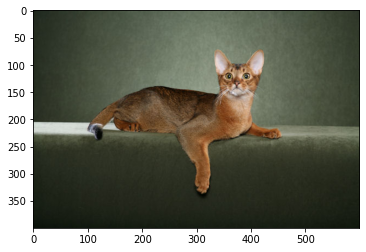

In [4]:
image_path = '/content/drive/MyDrive/image-data-augmentation/images/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


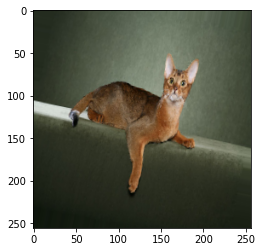

In [5]:
x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 3:Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


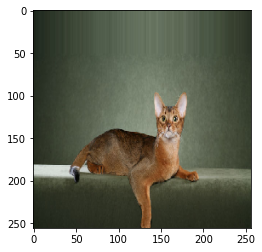

In [7]:
x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 4:Brightness

Found 1 images belonging to 1 classes.


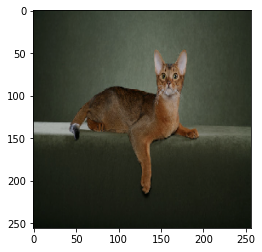

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.4, 2.5)
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 5:Shear Transformation

Found 1 images belonging to 1 classes.


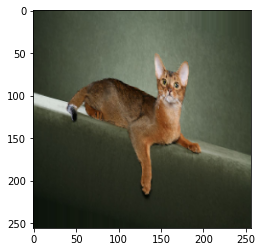

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 6:Zoom

Found 1 images belonging to 1 classes.


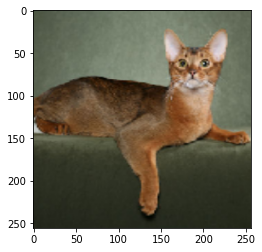

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = [0.5, 1.5]
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 7:Channel Shift

Found 1 images belonging to 1 classes.


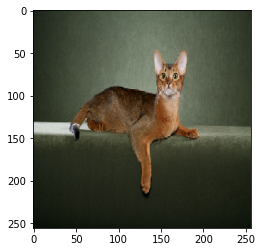

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [12]:
x.mean()

65.31525

In [13]:
np.array(Image.open(image_path)).mean()

69.57810416666666

## Task 8:Flips

Found 1 images belonging to 1 classes.


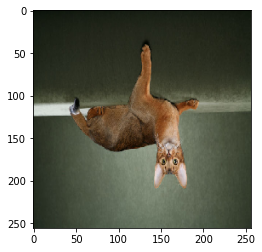

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('/content/drive/MyDrive/image-data-augmentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 9:Normalisation

### Featurewise

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170508288/170498071 [==============================] - 2s 0us/step


In [16]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

print(x.mean(), x.std(),y)
print(x_train.mean())

-0.57530504 1.1107361 [[1]]
120.70756512369792


### Samplewise

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator()

x, y = next(generator.flow(x_train, y_train, batch_size = 1))
print(x.mean(), x.std(),y)

160.56836 48.74895 [[2]]


## Task 10:Rescale and Processing Function

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
)

In [19]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

In [20]:
print(x.mean(), x.std(),y)

0.0015037978 0.54308146 [[7]]


## Task 11:Using in model training

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32, 32, 3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

9420800/9406464 [==============================] - 0s 0us/step


In [23]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs=5, steps_per_epoch=15
)

Epoch 1/5
15/15 [==============================] - 11s 303ms/step - loss: 3.1134 - accuracy: 0.1167
Epoch 2/5
15/15 [==============================] - 4s 297ms/step - loss: 2.8680 - accuracy: 0.0708
Epoch 3/5
15/15 [==============================] - 4s 290ms/step - loss: 2.5846 - accuracy: 0.0896
Epoch 4/5
15/15 [==============================] - 4s 292ms/step - loss: 2.1543 - accuracy: 0.1000
Epoch 5/5
15/15 [==============================] - 4s 290ms/step - loss: 2.1180 - accuracy: 0.1458
